## Global Temperature data 1850 - 2015
Unless otherwise noted temperatures in fahrenheit and CO2 thousands metric tons will be displayed in separate charts because of scale differences.

## Temperature Data Source:
* Data.World: https://data.world/data-society/global-climate-change-data
* Original Data Source:
* Kaggle: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
* Berkeley Earth Raw data:  http://berkeleyearth.org/data/
* Explains their data cleansing process: http://berkeleyearth.org/about-data-set/

In [22]:
import pandas as pd
import numpy as np
import scipy as sp
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates
import seaborn as sns
# Set my default color palette
mycolors = ["royalblue", "blue", "red", "green", "cyan", "orange", 
            "purple", "olive", "limegreen", "magenta", ]
sns.set_palette(mycolors)

In [23]:
# Store filepath in a variable: use parse_dates=["date"] 
# encoding="ISO-8859-1"
gllo = "./data/clean/clean_GlobalLandOceanTemps.csv"

# Read our Data file with the pandas library
gllo_df = pd.read_csv(gllo,parse_dates=["date"])
print(len(gllo_df.index))
gllo_df.info()

1992
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 13 columns):
date                             1992 non-null datetime64[ns]
land_avg_temp_f                  1992 non-null float64
land_avg_temp_c                  1992 non-null float64
land_avg_temp_uncertain          1992 non-null float64
land_max_temp_f                  1992 non-null float64
land_max_temp_c                  1992 non-null float64
land_max_temp_uncertain          1992 non-null float64
land_min_temp_f                  1992 non-null float64
land_min_temp_c                  1992 non-null float64
land_min_temp_uncertain          1992 non-null float64
land_ocean_avg_temp_f            1992 non-null float64
land_ocean_avg_temp_c            1992 non-null float64
land_ocean_avg_temp_uncertain    1992 non-null float64
dtypes: datetime64[ns](1), float64(12)
memory usage: 202.4 KB


In [24]:
gllo_df.head(5)

,date,land_avg_temp_f,land_avg_temp_c,land_avg_temp_uncertain,land_max_temp_f,land_max_temp_c,land_max_temp_uncertain,land_min_temp_f,land_min_temp_c,land_min_temp_uncertain,land_ocean_avg_temp_f,land_ocean_avg_temp_c,land_ocean_avg_temp_uncertain
0,1850-01-01,33.3482,0.749,1.105,46.8356,8.242,1.738,26.2292,-3.206,2.822,55.0994,12.833,0.367
1,1850-02-01,37.5278,3.071,1.275,49.9460,9.970,3.007,27.8762,-2.291,1.623,56.4584,13.588,0.414
2,1850-03-01,40.9172,4.954,0.955,50.6246,10.347,2.401,28.5710,-1.905,1.410,57.2774,14.043,0.341
3,1850-04-01,44.9906,7.217,0.665,55.2812,12.934,1.004,33.8324,1.018,1.329,58.4006,14.667,0.267
4,1850-05-01,50.0072,10.004,0.617,60.1790,15.655,2.406,38.8598,3.811,1.347,59.9126,15.507,0.249


In [25]:
# Get the min and max date range
gllo_min_date = gllo_df["date"].min()
gllo_max_date = gllo_df["date"].max()
print("min year " + datetime.strftime(gllo_min_date, '%Y-%m-%d') + " max year " + \
      datetime.strftime(gllo_max_date, '%Y-%m-%d'))

min year 1850-01-01 max year 2015-12-01


In [26]:
gllo_df.corr()

,land_avg_temp_f,land_avg_temp_c,land_avg_temp_uncertain,land_max_temp_f,land_max_temp_c,land_max_temp_uncertain,land_min_temp_f,land_min_temp_c,land_min_temp_uncertain,land_ocean_avg_temp_f,land_ocean_avg_temp_c,land_ocean_avg_temp_uncertain
land_avg_temp_f,1.000000,1.000000,-0.143129,0.995807,0.995807,-0.108462,0.995611,0.995611,-0.167451,0.988066,0.988066,-0.131412
land_avg_temp_c,1.000000,1.000000,-0.143129,0.995807,0.995807,-0.108462,0.995611,0.995611,-0.167451,0.988066,0.988066,-0.131412
land_avg_temp_uncertain,-0.143129,-0.143129,1.000000,-0.132905,-0.132905,0.866944,-0.165066,-0.165066,0.888717,-0.208008,-0.208008,0.972405
land_max_temp_f,0.995807,0.995807,-0.132905,1.000000,1.000000,-0.105349,0.993404,0.993404,-0.160020,0.983855,0.983855,-0.120563
land_max_temp_c,0.995807,0.995807,-0.132905,1.000000,1.000000,-0.105349,0.993404,0.993404,-0.160020,0.983855,0.983855,-0.120563
land_max_temp_uncertain,-0.108462,-0.108462,0.866944,-0.105349,-0.105349,1.000000,-0.123251,-0.123251,0.868702,-0.163396,-0.163396,0.860425
land_min_temp_f,0.995611,0.995611,-0.165066,0.993404,0.993404,-0.123251,1.000000,1.000000,-0.185512,0.986402,0.986402,-0.154931
land_min_temp_c,0.995611,0.995611,-0.165066,0.993404,0.993404,-0.123251,1.000000,1.000000,-0.185512,0.986402,0.986402,-0.154931
land_min_temp_uncertain,-0.167451,-0.167451,0.888717,-0.160020,-0.160020,0.868702,-0.185512,-0.185512,1.000000,-0.221746,-0.221746,0.880062
land_ocean_avg_temp_f,0.988066,0.988066,-0.208008,0.983855,0.983855,-0.163396,0.986402,0.986402,-0.221746,1.000000,1.000000,-0.203072


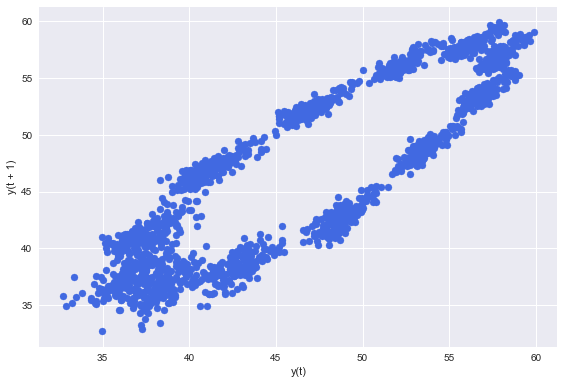

In [27]:
from pandas.plotting import lag_plot

plt.figure()
data = gllo_df["land_avg_temp_f"]
lag_plot(data)

plt.tight_layout()
plt.savefig("./images/lag-plot_lndavg_tmpf.png")
plt.show()

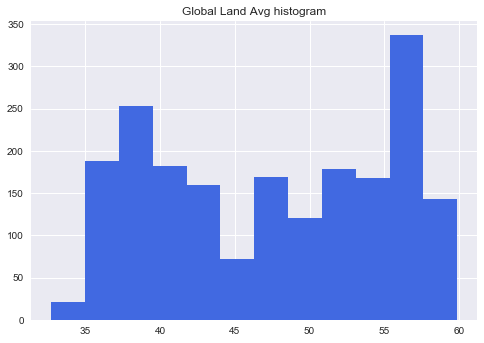

In [28]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(gllo_df["land_avg_temp_f"]) 
plt.hist(a, bins='auto') 
plt.title("Global Land Avg histogram")
plt.savefig("./images/global_lnd_avg_tmpf_histogram.png") 
plt.show()

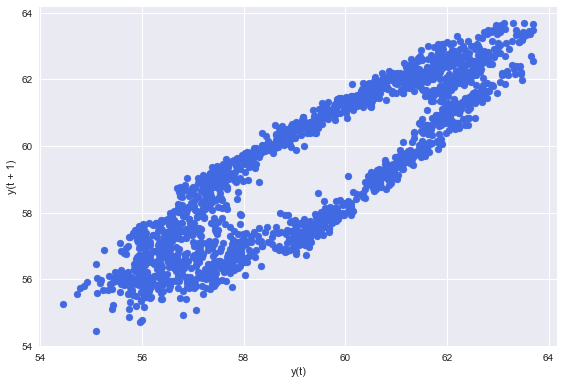

In [29]:
from pandas.plotting import lag_plot

plt.figure()
data = gllo_df["land_ocean_avg_temp_f"]
lag_plot(data)

plt.tight_layout()
plt.savefig("./images/lag-plot_lndoceanavg_tmpf.png")
plt.show()

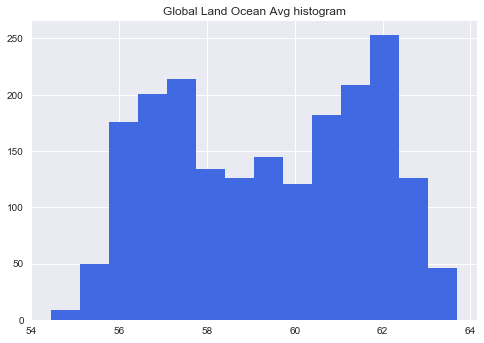

In [30]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(gllo_df["land_ocean_avg_temp_f"]) 
plt.hist(a, bins='auto') 
plt.title("Global Land Ocean Avg histogram")
plt.savefig("./images/global_lnd_ocn_avg_tmpf_histogram.png") 
plt.show()

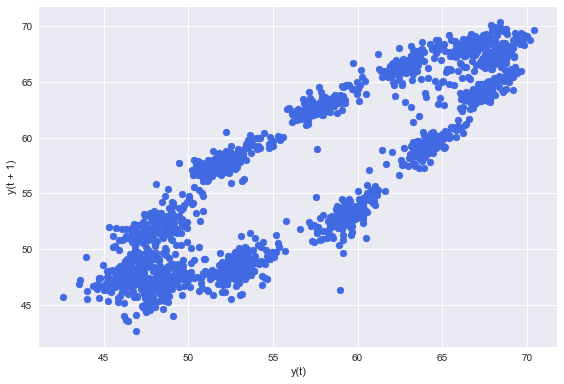

In [31]:
from pandas.plotting import lag_plot

plt.figure()
data = gllo_df["land_max_temp_f"]
lag_plot(data)

plt.tight_layout()
plt.savefig("./images/lag-plot_lndmax_tmpf.png")
plt.show()

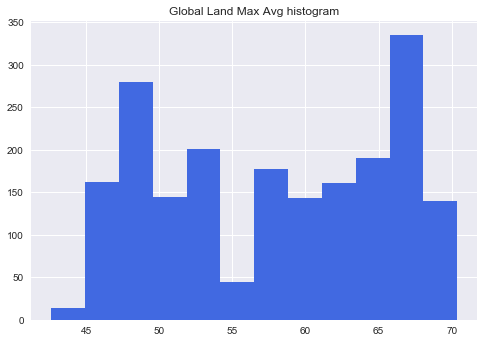

In [32]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(gllo_df["land_max_temp_f"]) 
plt.hist(a, bins='auto') 
plt.title("Global Land Max Avg histogram")
plt.savefig("./images/global_lnd_max_avg_tmpf_histogram.png") 
plt.show()

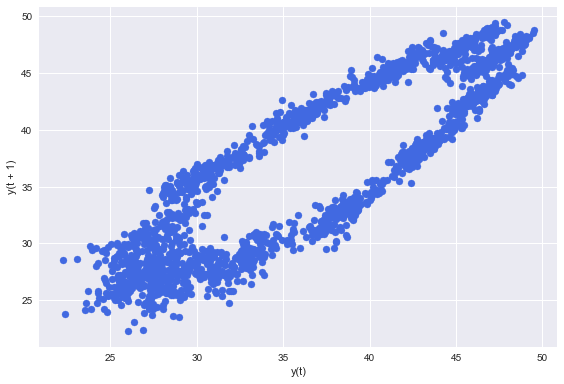

In [33]:
from pandas.plotting import lag_plot

plt.figure()
data = gllo_df["land_min_temp_f"]
lag_plot(data)

plt.tight_layout()
plt.savefig("./images/lag-plot_lndmin_tmpf.png")
plt.show()

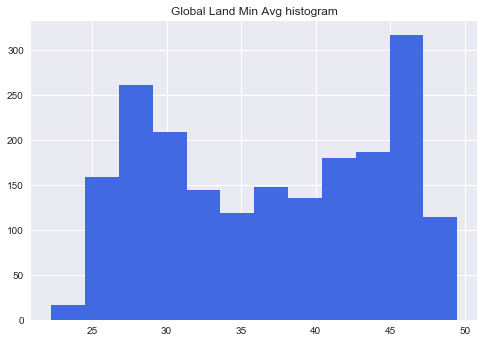

In [34]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(gllo_df["land_min_temp_f"]) 
plt.hist(a, bins='auto') 
plt.title("Global Land Min Avg histogram")
plt.savefig("./images/global_lnd_min_avg_tmpf_histogram.png") 
plt.show()

In [35]:
# create a year column for grouping
gllo_df["year"] = gllo_df["date"].dt.year
print(len(gllo_df.index))
gllo_df.head(5)

1992


,date,land_avg_temp_f,land_avg_temp_c,land_avg_temp_uncertain,land_max_temp_f,land_max_temp_c,land_max_temp_uncertain,land_min_temp_f,land_min_temp_c,land_min_temp_uncertain,land_ocean_avg_temp_f,land_ocean_avg_temp_c,land_ocean_avg_temp_uncertain,year
0,1850-01-01,33.3482,0.749,1.105,46.8356,8.242,1.738,26.2292,-3.206,2.822,55.0994,12.833,0.367,1850
1,1850-02-01,37.5278,3.071,1.275,49.9460,9.970,3.007,27.8762,-2.291,1.623,56.4584,13.588,0.414,1850
2,1850-03-01,40.9172,4.954,0.955,50.6246,10.347,2.401,28.5710,-1.905,1.410,57.2774,14.043,0.341,1850
3,1850-04-01,44.9906,7.217,0.665,55.2812,12.934,1.004,33.8324,1.018,1.329,58.4006,14.667,0.267,1850
4,1850-05-01,50.0072,10.004,0.617,60.1790,15.655,2.406,38.8598,3.811,1.347,59.9126,15.507,0.249,1850


In [36]:
gllo_avg_df = gllo_df.groupby(["year"],\
              as_index=False)["land_avg_temp_f","land_max_temp_f",
              "land_min_temp_f","land_ocean_avg_temp_f"].mean().\
              rename(columns={"land_avg_temp_f": "ylylndavg_tmpf",
                        "land_max_temp_f": "ylylndmax_tmpf",
                        "land_min_temp_f": "ylylndmin_tmpf",
                        "land_ocean_avg_temp_f": "ylylndocnavg_tmpf"})        
gllo_avg_df.head(5)

,year,ylylndavg_tmpf,ylylndmax_tmpf,ylylndmin_tmpf,ylylndocnavg_tmpf
0,1850,46.22120,56.25800,35.53580,58.7609
1,1851,46.72145,55.54580,35.96705,58.9853
2,1852,46.58030,56.11520,36.20660,59.0117
3,1853,46.47530,56.99585,35.40650,58.9193
4,1854,46.77890,57.15935,35.17190,58.9838


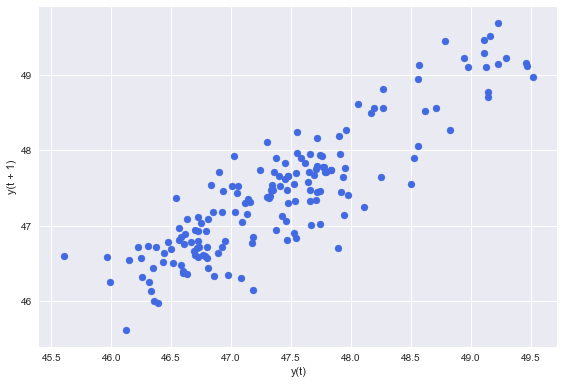

In [37]:
from pandas.plotting import lag_plot

plt.figure()
data = gllo_avg_df["ylylndavg_tmpf"]
lag_plot(data)

plt.tight_layout()
plt.savefig("./images/gallo_lag-plot_lndavg_tmpf.png")
plt.show()

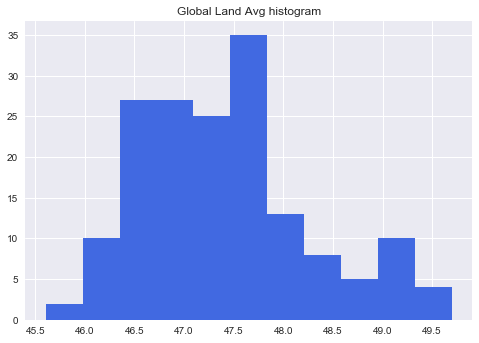

In [38]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(gllo_avg_df["ylylndavg_tmpf"]) 
plt.hist(a, bins='auto') 
plt.title("Global Land Avg histogram")
plt.savefig("./images/gallo_global_lnd_avg_tmpf_histogram.png") 
plt.show()

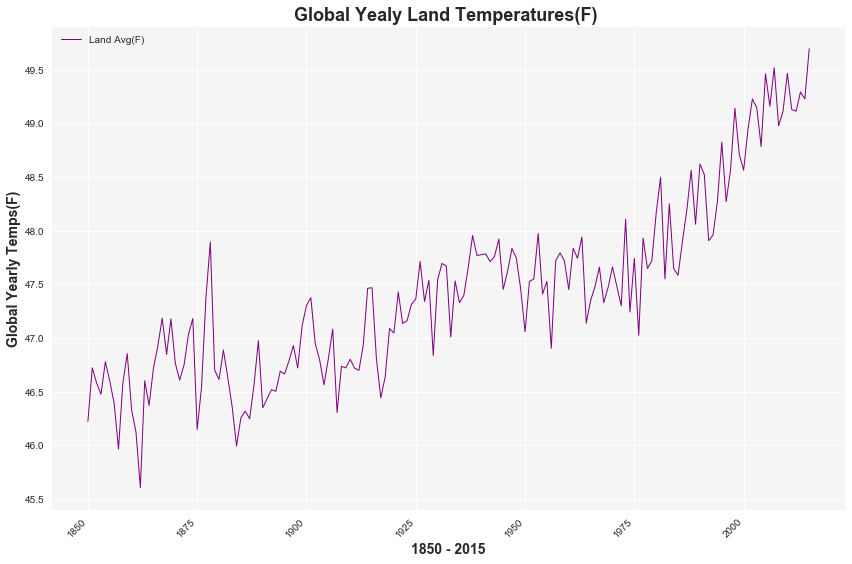

In [39]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = gllo_avg_df["year"]  
y1_axis = gllo_avg_df["ylylndavg_tmpf"]

ax.set_title("Global Yealy Land Temperatures(F) ",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("1850 - 2015",weight='bold').set_fontsize('14')
ax.set_ylabel("Global Yearly Temps(F)",weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')

ax.plot(x_axis, y1_axis, color="purple", linewidth= 1)

ax.legend(["Land Avg(F)"], loc="best")

plt.tight_layout()
plt.savefig("./images/global_1850-2015_yearly_land_avg_tempf.png")
plt.show()

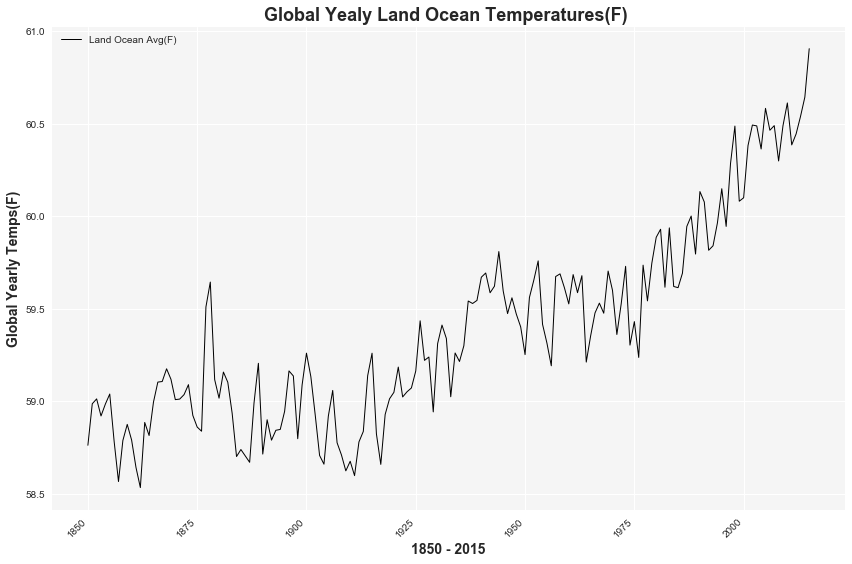

In [40]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = gllo_avg_df["year"]  
y1_axis = gllo_avg_df["ylylndocnavg_tmpf"]

ax.set_title("Global Yealy Land Ocean Temperatures(F) ",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("1850 - 2015",weight='bold').set_fontsize('14')
ax.set_ylabel("Global Yearly Temps(F)",weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')

ax.plot(x_axis, y1_axis, color="black", linewidth= 1)

ax.legend(["Land Ocean Avg(F)"], loc="best")

plt.tight_layout()
plt.savefig("./images/global_1850-2015_yearly_land_ocean_avg_tempf.png")
plt.show()

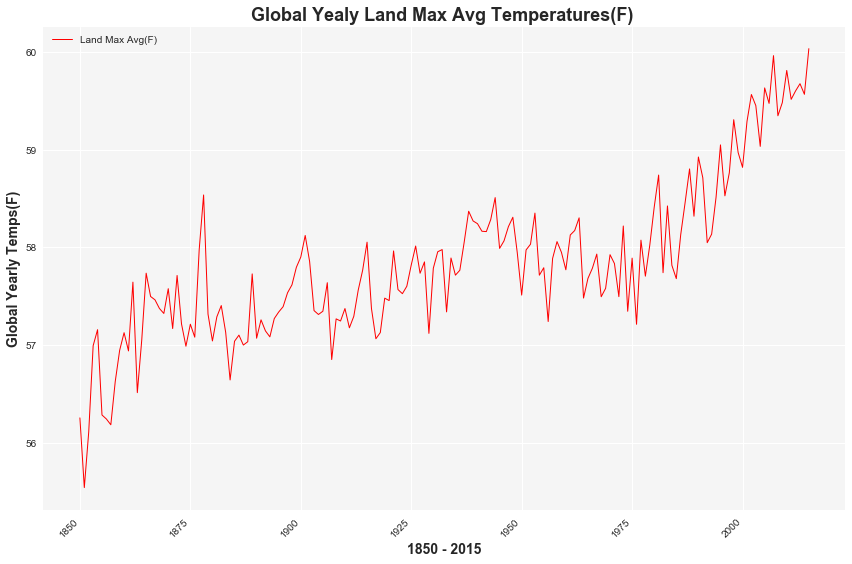

In [41]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = gllo_avg_df["year"]  
y1_axis = gllo_avg_df["ylylndmax_tmpf"]

ax.set_title("Global Yealy Land Max Avg Temperatures(F) ",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("1850 - 2015",weight='bold').set_fontsize('14')
ax.set_ylabel("Global Yearly Temps(F)",weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')

ax.plot(x_axis, y1_axis, color="red", linewidth= 1)

ax.legend(["Land Max Avg(F)"], loc="best")

plt.tight_layout()
plt.savefig("./images/global_1850-2015_yearly_land_max_avg_tempf.png")
plt.show()

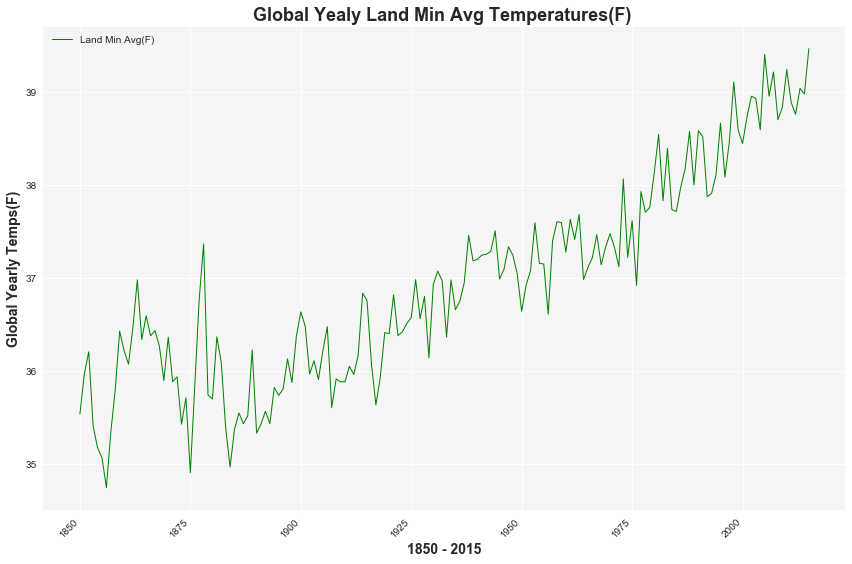

In [43]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = gllo_avg_df["year"]  
y1_axis = gllo_avg_df["ylylndmin_tmpf"]

ax.set_title("Global Yealy Land Min Avg Temperatures(F) ",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("1850 - 2015",weight='bold').set_fontsize('14')
ax.set_ylabel("Global Yearly Temps(F)",weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')

ax.plot(x_axis, y1_axis, color="green", linewidth= 1)

ax.legend(["Land Min Avg(F)"], loc="best")

plt.tight_layout()
plt.savefig("./images/global_1850-2015_yearly_land_min_avg_tempf.png")
plt.show()

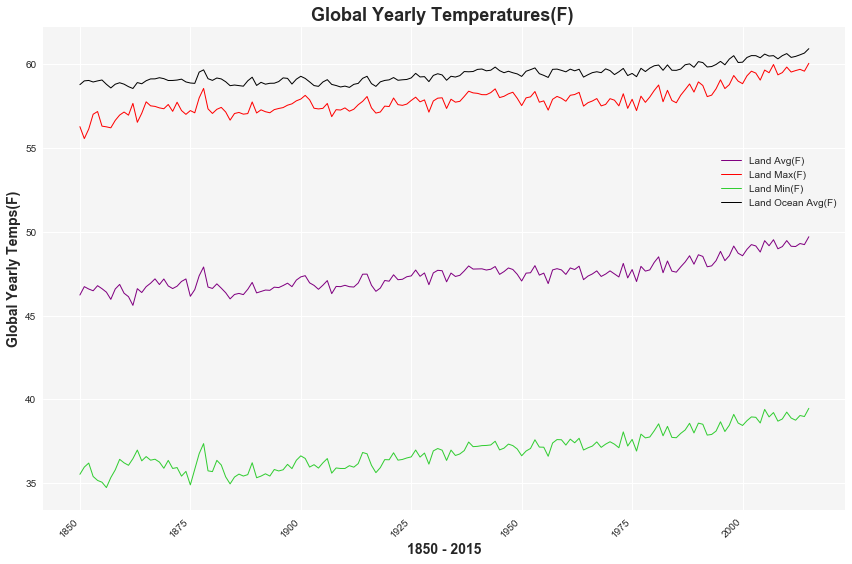

In [42]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = gllo_avg_df["year"]  
y1_axis = gllo_avg_df["ylylndavg_tmpf"]
y2_axis = gllo_avg_df["ylylndmax_tmpf"]
y3_axis = gllo_avg_df["ylylndmin_tmpf"]
y4_axis = gllo_avg_df["ylylndocnavg_tmpf"]

ax.set_title("Global Yearly Temperatures(F) ",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("1850 - 2015", weight='bold').set_fontsize('14')
ax.set_ylabel("Global Yearly Temps(F)", 
              weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.plot(x_axis, y1_axis, color="purple", linewidth= 1)
ax.plot(x_axis, y2_axis, color="red", linewidth= 1)
ax.plot(x_axis, y3_axis, color="limegreen", linewidth= 1)
ax.plot(x_axis, y4_axis, color="black", linewidth= 1)


ax.legend(["Land Avg(F)","Land Max(F)","Land Min(F)",
           "Land Ocean Avg(F)"], loc="best",
           bbox_to_anchor=(1, 0.75))

plt.tight_layout()
plt.savefig("./images/global_1850-2015_yearly_tempf.png")
plt.show()